Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [x] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [x] After you remove outliers, what is the mean price in your subset of the data?
- [x] Choose a feature, and plot its relationship with the target.
- [x] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.

In [1]:
conda install geopandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [6]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [7]:
# Read New York City apartment rental listing data
import pandas as pd
import pandas_profiling
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [8]:
df.columns = [col.replace(' ','-') for col in df]

In [9]:
df.profile_report()


In [10]:
mask = df['display_address'].str.contains('Broadway',na=False)
df[mask]

bathrooms  bedrooms              created  \
53           1.0         1  2016-04-09 02:34:39   
310          2.0         2  2016-04-20 02:13:36   
371          3.0         3  2016-04-07 05:34:51   
566          1.0         1  2016-04-10 05:33:03   
579          1.0         0  2016-06-10 03:31:11   
615          1.0         0  2016-04-12 04:27:53   
951          1.0         2  2016-04-13 06:56:20   
1022         1.0         3  2016-04-10 02:55:27   
1029         1.0         2  2016-06-07 04:41:36   
1060         1.0         3  2016-04-27 05:57:36   
1118         1.0         1  2016-04-26 02:17:12   
1146         1.0         2  2016-04-13 10:22:32   
1150         1.0         1  2016-04-15 01:14:16   
1263         1.0         1  2016-04-09 01:40:17   
1746         1.0         1  2016-04-06 08:09:43   
1801         1.0         1  2016-04-09 02:13:44   
2009         1.0         1  2016-04-26 05:56:54   
2039         1.0         1  2016-04-22 03:38:30   
2206         1.0         0  2016-04-16 02:29:12   
2708         2.0         4  2016-04-02 05:38:56   
2737         1.0         1  2016-04-28 04:32:44   
2745         2.0         2  2016-04-21 03:07:17   
2895         1.0         2  2016-04-14 03:08:15   
3089         1.0         0  2016-04-19 03:12:02   
3270         2.0         2  2016-04-22 02:11:12   
3312         1.0         3  2016-04-27 03:44:56   
3435         1.0         3  2016-04-02 03:12:39   
3448         1.0         1  2016-04-12 05:29:56   
3493         1.0         1  2016-04-02 03:11:39   
3539         1.0         1  2016-04-28 03:08:20   
...          ...       ...                  ...   
45809        1.0         0  2016-06-11 05:16:34   
45810        2.0         2  2016-04-10 05:35:27   
45836        1.0         0  2016-04-28 04:44:46   
45874        1.0         2  2016-04-14 02:59:01   
45925        2.0         4  2016-04-20 05:53:35   
45941        2.0         4  2016-04-06 18:07:21   
46147        1.0         0  2016-04-22 06:00:34   
46282        1.0         3  2016-04-29 03:22:18   
46335        1.0         0  2016-06-20 14:23:22   
46360        2.0         4  2016-04-16 05:29:58   
46407        2.0         4  2016-04-06 06:43:55   
46682        2.0         4  2016-04-02 04:59:16   
46762        1.0         1  2016-04-11 03:12:26   
46935        1.0         0  2016-04-26 01:14:08   
47096        1.0         0  2016-04-12 03:53:39   
47310        1.0         1  2016-04-19 03:39:50   
47331        1.0         3  2016-04-20 03:29:11   
47547        1.0         1  2016-04-09 04:50:25   
47677        1.0         1  2016-04-10 02:21:26   
47834        1.0         1  2016-06-29 02:27:21   
47889        1.0         2  2016-06-29 06:13:02   
48182        1.0         0  2016-04-24 02:21:44   
48395        1.0         1  2016-04-29 02:23:07   
48475        1.0         2  2016-04-02 05:38:02   
48497        1.0         0  2016-06-09 03:17:31   
48523        1.0         1  2016-04-26 04:07:22   
48662        1.0         1  2016-04-18 02:22:48   
48823        1.0         1  2016-04-06 15:42:15   
49065        1.0         0  2016-04-07 06:01:46   
49317        1.0         1  2016-04-11 12:17:46   

                                             description  \
53     NO Brokers FEE !! Renovated LARGE ALCOVE STUDI...   
310    Stunning 2 bedroom, 2 full bathroom apartment ...   
371    Perfect UWS location near Central Park & Linco...   
566    BEAUTIFUL HOME, 2 bedroom apartment with priva...   
579    LOCATION: 184th &amp; Broadway.*Call Corey any...   
615                                                        
951    This apartment has an amazing southwest view o...   
1022   Elevator building, laundry in building, heat, ...   
1029   Spacious 2 bedroom, one bath, the huge black f...   
1060   Welcome to this huge flex 3 bedroom apartment....   
1118   This 1 bed/1bath features a living room/dining...   
1146   Flex 2 bedroom apartment in downtown Manhattan...   
1150   This is an incredible rental. You should absol...   
1263

In [11]:
df = df[mask]

df.shape

(553, 34)

In [12]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

bathrooms  bedrooms  latitude  longitude  price  elevator  \
count        553       553       553        553    553       553   
mean           1         2        41        -74  3,221         1   
std            0         1         0          0  2,295         0   
min            0         0        41        -74    401         0   
25%            1         1        41        -74  1,950         0   
50%            1         1        41        -74  2,658         1   
75%            1         2        41        -74  3,490         1   
max            4         6        41        -74 25,000         1   

       cats_allowed  hardwood_floors  dogs_allowed  doorman  ...  \
count           553              553           553      553  ...   
mean              1                0             0        0  ...   
std               1                0             1        0  ...   
min               0                0             0        0  ...   
25%               0                0             0        0  ...   
50%               1                0             0        0  ...   
75%               1                1             1        1  ...   
max               1                1             1        1  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
count                  553      553            553               553      553   
mean                     0        0              0                 0        0   
std                      0        0              0                 0        0   
min                      0        0              0                 0        0   
25%                      0        0              0                 0        0   
50%                      0        0              0                 0        0   
75%                      0        0              0                 0        0   
max                      1        1              1                 1        1   

       exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
count        553   553           553                553                   553  
mean           0     0             0                  0                     0  
std            0     0             0                  0                     0  
min            0     0             0                  0                     0  
25%            0     0             0                  0                     0  
50%            0     0             0                  0                     0  
75%            0     0             0                  0                     0  
max            1     1             1                  1                     1  

[8 rows x 29 columns]

In [13]:
#so here Max rent price is 25,000
#Look at this abservation

df.query('price ==25000')

bathrooms  bedrooms              created  \
13699          3         3  2016-06-12 02:14:37   

                                             description display_address  \
13699  Best of both worlds in the Soho Mews Condomini...   West Broadway   

       latitude  longitude  price     street_address interest_level  ...  \
13699        41        -74  25000  311 West Broadway            low  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
13699                    0        0              0                 0        1   

       exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
13699          0     0             0                  0                     0  

[1 rows x 34 columns]

In [14]:
df['bedrooms'].value_counts()

1    180
2    165
0    106
3     69
4     28
5      3
6      2
Name: bedrooms, dtype: int64

In [15]:
df = df.query('bedrooms == 1')
df.describe()

bathrooms  bedrooms  latitude  longitude  price  elevator  \
count        180       180       180        180    180       180   
mean           1         1        41        -74  2,663         1   
std            0         0         0          0  1,081         0   
min            0         1        41        -74    401         0   
25%            1         1        41        -74  1,950         0   
50%            1         1        41        -74  2,150         1   
75%            1         1        41        -74  3,306         1   
max            2         1        41        -74  7,495         1   

       cats_allowed  hardwood_floors  dogs_allowed  doorman  ...  \
count           180              180           180      180  ...   
mean              1                0             1        0  ...   
std               0                1             0        0  ...   
min               0                0             0        0  ...   
25%               0                0             0        0  ...   
50%               1                0             1        0  ...   
75%               1                1             1        1  ...   
max               1                1             1        1  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
count                  180      180            180               180      180   
mean                     0        0              0                 0        0   
std                      0        0              0                 0        0   
min                      0        0              0                 0        0   
25%                      0        0              0                 0        0   
50%                      0        0              0                 0        0   
75%                      0        0              0                 0        0   
max                      1        1              1                 1        1   

       exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
count        180   180           180                180                   180  
mean           0     0             0                  0                     0  
std            0     0             0                  0                     0  
min            0     0             0                  0                     0  
25%            0     0             0                  0                     0  
50%            0     0             0                  0                     0  
75%            0     0             0                  0                     0  
max            1     1             1                  1                     1  

[8 rows x 29 columns]

In [16]:
# so no max price is 7,495
df.query('price == 7495')

bathrooms  bedrooms              created  \
5488          2         1  2016-04-11 13:06:03   

                                            description display_address  \
5488  Overlooking Lincoln Center on one side, Centra...        Broadway   

      latitude  longitude  price street_address interest_level  ...  \
5488        41        -74   7495  1930 Broadway            low  ...   

      high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
5488                    0        0              0                 0        0   

      exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
5488          0     0             0                  0                     0  

[1 rows x 34 columns]

In [17]:
#here i looking at the min rent price
df.query('price == 401')

bathrooms  bedrooms              created  \
7654          1         1  2016-04-14 03:39:47   

                                            description display_address  \
7654  Now available, absolutely stunning 1 bedroom 1...        Broadway   

      latitude  longitude  price street_address interest_level  ...  \
7654        41        -74    401  2350 Broadway            low  ...   

      high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
7654                    0        0              0                 0        0   

      exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
7654          0     0             0                  0                     0  

[1 rows x 34 columns]

In [18]:
df.query('bathrooms > 1')

bathrooms  bedrooms              created  \
3729           2         1  2016-04-22 05:45:47   
3831           2         1  2016-04-09 02:28:01   
5488           2         1  2016-04-11 13:06:03   
42399          2         1  2016-04-13 21:57:41   

                                             description    display_address  \
3729   Overlooking Lincoln Center on one side, Centra...           Broadway   
3831   CooperCooper.com :: Listing ID #12AA.jj37; Acc...           Broadway   
5488   Overlooking Lincoln Center on one side, Centra...           Broadway   
42399  Rare Availability for unique Upper West Side D...  87th and Broadway   

       latitude  longitude  price     street_address interest_level  ...  \
3729         41        -74   4995      1930 Broadway            low  ...   
3831         41        -74   6512      1930 Broadway            low  ...   
5488         41        -74   7495      1930 Broadway            low  ...   
42399        41        -74   3350  265 West 87th St.         medium  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
3729                     0        0              0                 0        0   
3831                     0        0              0                 0        0   
5488                     0        0              0                 0        0   
42399                    0        0              0                 0        0   

       exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
3729           0     0             0                  0                     0  
3831           0     0             0                  0                     0  
5488           0     0             0                  0                     0  
42399          0     0             0                  0                     0  

[4 rows x 34 columns]

In [49]:
#Scatter plot
import plotly.express as px
px.scatter(df, x='longitude', y='price')

In [50]:
px.scatter(df, x='longitude', y='price', trendline='ols')

In [21]:
# look at rent price > 4000
df.query('price > 4000')

bathrooms  bedrooms              created  \
566            1         1  2016-04-10 05:33:03   
3448           1         1  2016-04-12 05:29:56   
3729           2         1  2016-04-22 05:45:47   
3831           2         1  2016-04-09 02:28:01   
5488           2         1  2016-04-11 13:06:03   
8989           1         1  2016-04-05 03:38:41   
10176          1         1  2016-04-07 06:07:52   
14093          1         1  2016-06-23 01:39:01   
15645          1         1  2016-06-15 05:37:18   
16142          1         1  2016-06-16 01:26:43   
16701          1         1  2016-06-16 06:37:28   
17282          1         1  2016-06-25 01:40:22   
18722          1         1  2016-06-15 02:29:23   
19825          1         1  2016-06-28 05:21:40   
32672          1         1  2016-05-21 01:32:20   
33342          1         1  2016-05-13 01:33:15   
37706          1         1  2016-06-07 04:20:01   
39015          1         1  2016-05-17 01:38:33   

                                             description display_address  \
566    BEAUTIFUL HOME, 2 bedroom apartment with priva...  Broadway Alley   
3448   Perfect UWS location near Central Park & Linco...        Broadway   
3729   Overlooking Lincoln Center on one side, Centra...        Broadway   
3831   CooperCooper.com :: Listing ID #12AA.jj37; Acc...        Broadway   
5488   Overlooking Lincoln Center on one side, Centra...        Broadway   
8989   ***BEST IN THE WEST - Amazing unit with sunset...        Broadway   
10176  Rarely Available, Large Loft-Like 1 Bedroom Wi...   West Broadway   
14093                                                NaN        Broadway   
15645  ***BEST IN THE WEST - Amazing unit with sunset...        Broadway   
16142  *Large one bedroom with a perfect Upper West S...        Broadway   
16701  This spectacular newly renovated one bedroom a...        Broadway   
17282  New to market unit in SOHO! FULLY GUT RENOVATE...   West Broadway   
18722  CooperCooper.com :: Listing ID #12AA.jj37; Acc...        Broadway   
19825  * NO BROKER FEE *WANT TO LIVE IN THE HEART OF ...   West Broadway   
32672  **NO FEE**Amazing one bedroom on West Broadway...   West Broadway   
33342  Great value: no fee. Total renovation, brand n...   West Broadway   
37706  Perfect UWS location near Central Park & Linco...        Broadway   
39015  This bright, loft residence offers barrel vaul...        Broadway   

       latitude  longitude  price       street_address interest_level  ...  \
566          41        -74   4395  1930 Broadway Alley            low  ...   
3448         41        -74   5000        1930 Broadway         medium  ...   
3729         41        -74   4995        1930 Broadway            low  ...   
3831         41        -74   6512        1930 Broadway            low  ...   
5488         41        -74   7495        1930 Broadway            low  ...   
8989         41        -74   4500        1930 Broadway            low  ...   
10176        41        -74   4732    426 West Broadway            low  ...   
14093        41        -74   4995        1930 BROADWAY            low  ...   
15645        41        -74   4500        1930 Broadway            low  ...   
16142        41        -74   5195        1930 Broadway            low  ...   
16701        41        -74   4300          71 Broadway            low  ...   
17282        41        -74   4400    475 West Broadway            low  ...   
18722        41        -74   5295        1930 Broadway            low  ...   
19825        41        -74   4300    475 West Broadway            low  ...   
32672        41        -74   4400    475 West Broadway            low  ...   
33342        41        -74   4400    475 West Broadway            low  ...   
37706        41        -74   4500        1930 Broadway            low  ...   
39015        41        -74   6830         640 Broadway            low  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
566                      0  

In [27]:
#we wanna keep the the rows less than 4000
df = df.query('price < 4000')
df.shape


(162, 34)

In [28]:
df['price'].describe()

count     162
mean    2,399
std       709
min       401
25%     1,950
50%     2,075
75%     3,008
max     3,923
Name: price, dtype: float64

In [29]:
px.scatter(df, x='longitude', y='price',trendline='ols')

In [40]:
# 1. import the appropriate estimator class from Scikit-learn
from sklearn.linear_model import LinearRegression

#2. Instatiate this class
model = LinearRegression()

#3 Arrange X feature matrix & y target vector
features = ['longitude']
target = ['price']
X = df[features]
y = df[target]

#4 Fit() the model
model.fit(X, y)

#5 Apply the model
y_pred = model.predict(X)

In [34]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [37]:
df[['longitude']]

longitude
53           -74
1118         -74
1150         -74
1263         -74
1746         -74
1801         -74
2009         -74
2039         -74
2737         -74
3493         -74
3539         -74
3708         -74
3715         -74
3872         -74
5324         -74
5815         -74
6131         -74
6136         -74
7076         -74
7105         -74
7333         -74
7365         -74
7623         -74
7654         -74
7939         -74
8188         -74
8638         -74
8668         -74
8784         -74
9389         -74
...          ...
40092        -74
40213        -74
40310        -74
40561        -74
40595        -74
40717        -74
40814        -74
40961        -74
41102        -74
41160        -74
42235        -74
42399        -74
42775        -74
43434        -74
43528        -74
44501        -74
44728        -74
45542        -74
45754        -74
45808        -74
46762        -74
47310        -74
47547        -74
47677        -74
47834        -74
48395        -74
48523        -74
48662        -74
48823        -74
49317        -74

[162 rows x 1 columns]

In [38]:
df['price']

53       3300
1118     3585
1150     2525
1263     3585
1746     3530
1801     2450
2009     1955
2039     1950
2737     3860
3493     1950
3539     2800
3708     1525
3715     1975
3872     2995
5324     2675
5815     2100
6131     1645
6136     1995
7076     1650
7105     2900
7333     1724
7365     1950
7623     2675
7654      401
7939     1955
8188     3600
8638     1700
8668     2900
8784     1995
9389     2395
         ... 
40092    1975
40213    3175
40310    2050
40561    1795
40595    2150
40717    2800
40814    2675
40961    1625
41102    2100
41160    2850
42235    1950
42399    3350
42775    3450
43434    3735
43528    1940
44501    1950
44728    1600
45542    2980
45754    1950
45808    2300
46762    2925
47310    2150
47547    1525
47677    1950
47834    3325
48395    1300
48523    1950
48662    1900
48823    3300
49317    2954
Name: price, Length: 162, dtype: int64

In [36]:
X.shape, y.shape

((162, 1), (162, 1))

In [42]:
type(y_pred)

numpy.ndarray

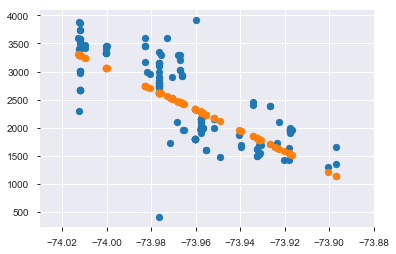

In [43]:
#plot actual vs predicted
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.scatter(X, y_pred)

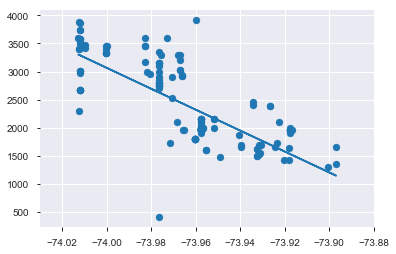

In [44]:
plt.scatter(X, y)
plt.plot(X, y_pred);

In [45]:
#what patter did th emodel 'learn'
#about the relationship between longitude and price
model.coef_

array([[-18616.10591984]])

In [46]:
model.intercept_

array([-1374526.17121395])

In [53]:
print(f'y = {model.coef_[0]}*x + {model.intercept_}')
print(f'price = {model.coef_[0]}*longitude +{model.intercept_}')


y = [-18616.10591984]*x + [-1374526.17121395]
price = [-18616.10591984]*longitude +[-1374526.17121395]
